In [1]:
import time
import os
import subprocess
import matplotlib.pyplot as plt
import cv2
from function import replace_zeros_with_median,dtof_hist_with_img,create_histogram_from_binary_nods,center_of_mass_test
from skimage.registration import optical_flow_tvl1
import numpy as np
from scipy import ndimage
from skimage.transform import warp

In [2]:

PATH_TO_HVSR = "/home/ar432/DVSR" # PATH to Super-resolution network download from: https://github.com/facebookresearch/DVSR
name_path = 'TestgithubMiddlebury' # PATH TO SAVE
path = f'/home/ar432/DVSR/data/{name_path}'


N_iterations = 10    # number of iterations
num_bins = 100      # number of bins in the histogram
M = 100             # number of binary frames between two RGB frames
SpeedZ = 0.2 
max_val = 120+100*12*SpeedZ



iter 0


/home/ar432/miniconda3/envs/dvsr2/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-10-24 14:16:38,461 - mmseg - INFO - load checkpoint from local path: pretrained/spynet_20210409-c6c1bd09.pth
2024-10-24 14:16:38,523 - mmseg - INFO - load checkpoint from local path: pretrained/spynet_20210409-c6c1bd09.pth
/home/ar432/miniconda3/envs/dvsr2/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-d

iter 1


/home/ar432/miniconda3/envs/dvsr2/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-10-24 14:17:24,070 - mmseg - INFO - load checkpoint from local path: pretrained/spynet_20210409-c6c1bd09.pth
2024-10-24 14:17:24,130 - mmseg - INFO - load checkpoint from local path: pretrained/spynet_20210409-c6c1bd09.pth
/home/ar432/miniconda3/envs/dvsr2/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-d

iter 2


/home/ar432/miniconda3/envs/dvsr2/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-10-24 14:17:59,334 - mmseg - INFO - load checkpoint from local path: pretrained/spynet_20210409-c6c1bd09.pth
2024-10-24 14:17:59,393 - mmseg - INFO - load checkpoint from local path: pretrained/spynet_20210409-c6c1bd09.pth
/home/ar432/miniconda3/envs/dvsr2/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-d

iter 3


/home/ar432/miniconda3/envs/dvsr2/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-10-24 14:18:34,435 - mmseg - INFO - load checkpoint from local path: pretrained/spynet_20210409-c6c1bd09.pth
2024-10-24 14:18:34,494 - mmseg - INFO - load checkpoint from local path: pretrained/spynet_20210409-c6c1bd09.pth
/home/ar432/miniconda3/envs/dvsr2/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-d

iter 4


/home/ar432/miniconda3/envs/dvsr2/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-10-24 14:19:09,435 - mmseg - INFO - load checkpoint from local path: pretrained/spynet_20210409-c6c1bd09.pth
2024-10-24 14:19:09,497 - mmseg - INFO - load checkpoint from local path: pretrained/spynet_20210409-c6c1bd09.pth
/home/ar432/miniconda3/envs/dvsr2/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-d

iter 5


/home/ar432/miniconda3/envs/dvsr2/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-10-24 14:19:44,764 - mmseg - INFO - load checkpoint from local path: pretrained/spynet_20210409-c6c1bd09.pth
2024-10-24 14:19:44,824 - mmseg - INFO - load checkpoint from local path: pretrained/spynet_20210409-c6c1bd09.pth
/home/ar432/miniconda3/envs/dvsr2/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-d

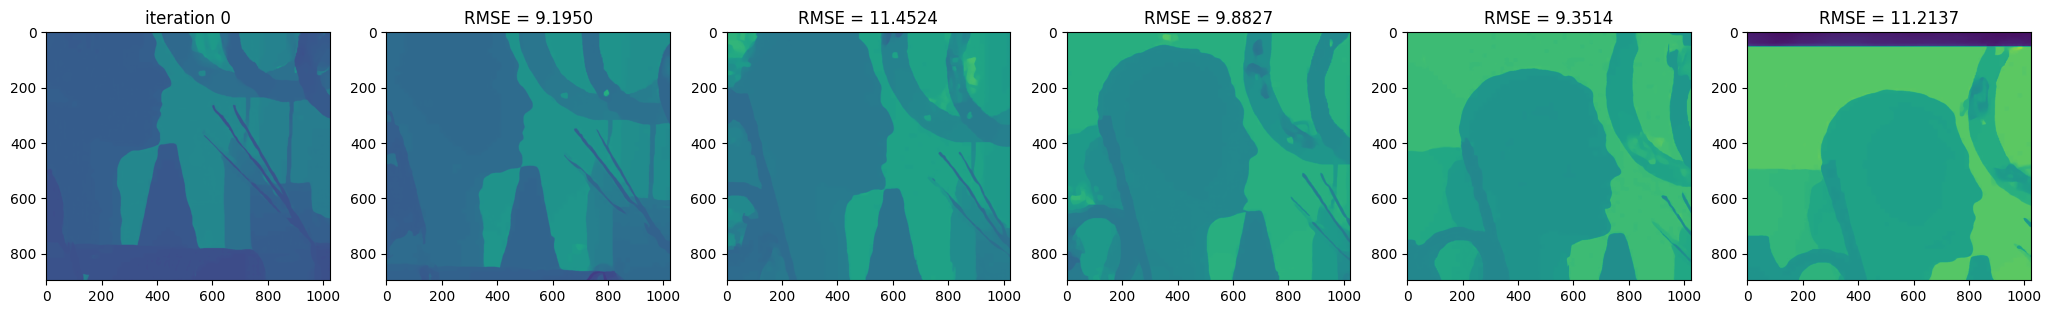

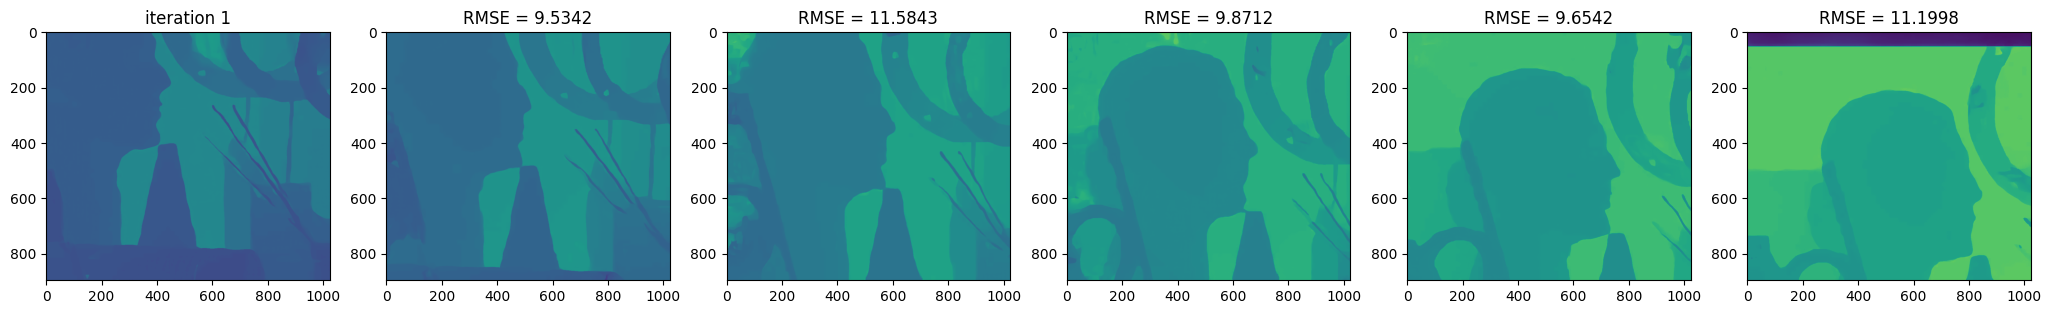

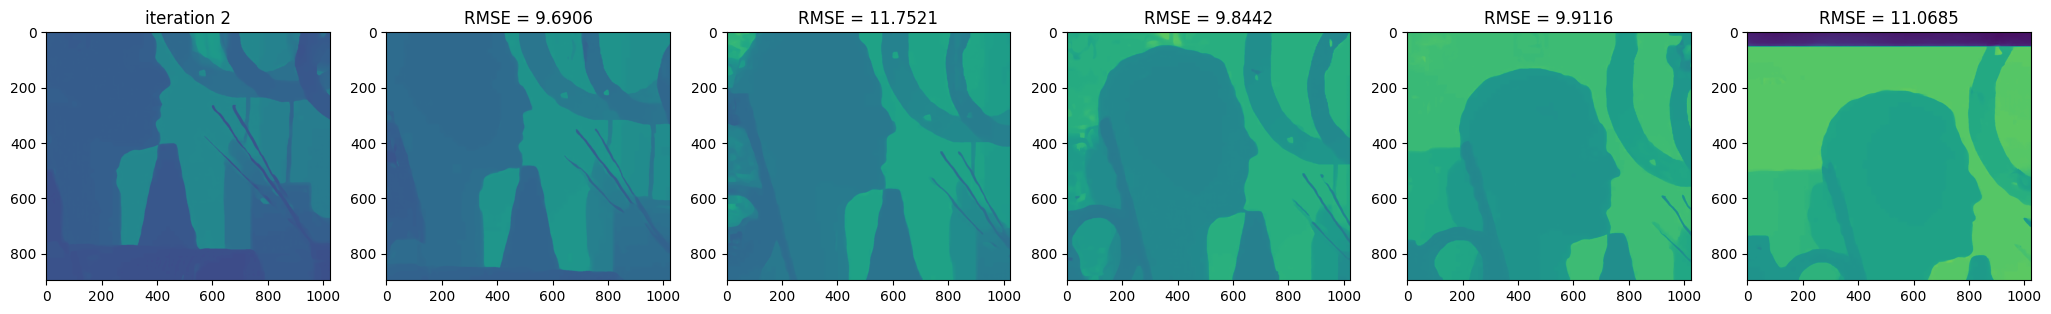

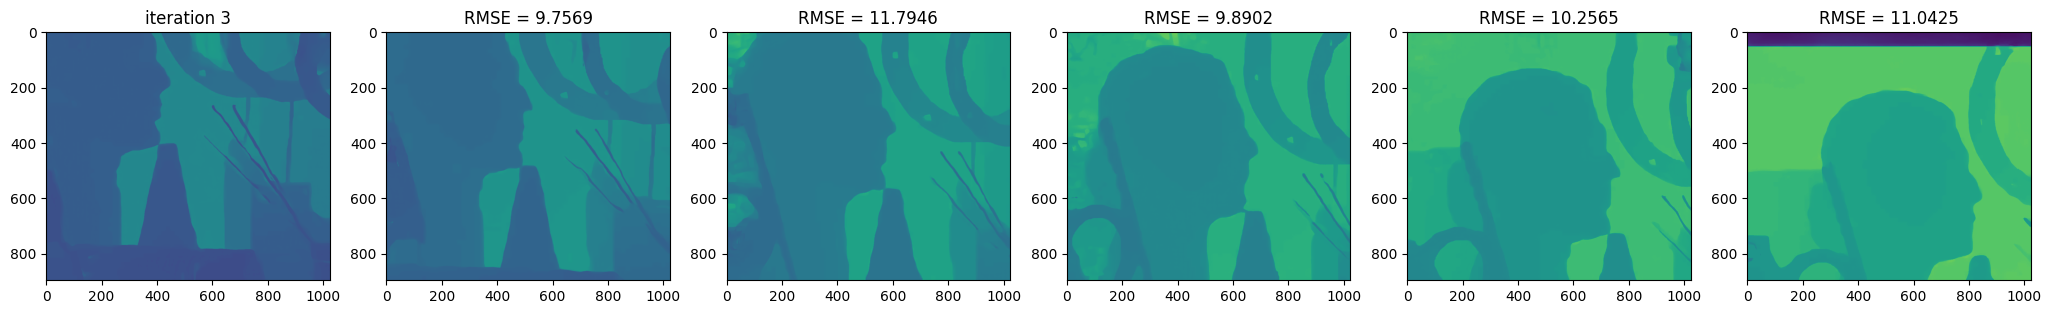

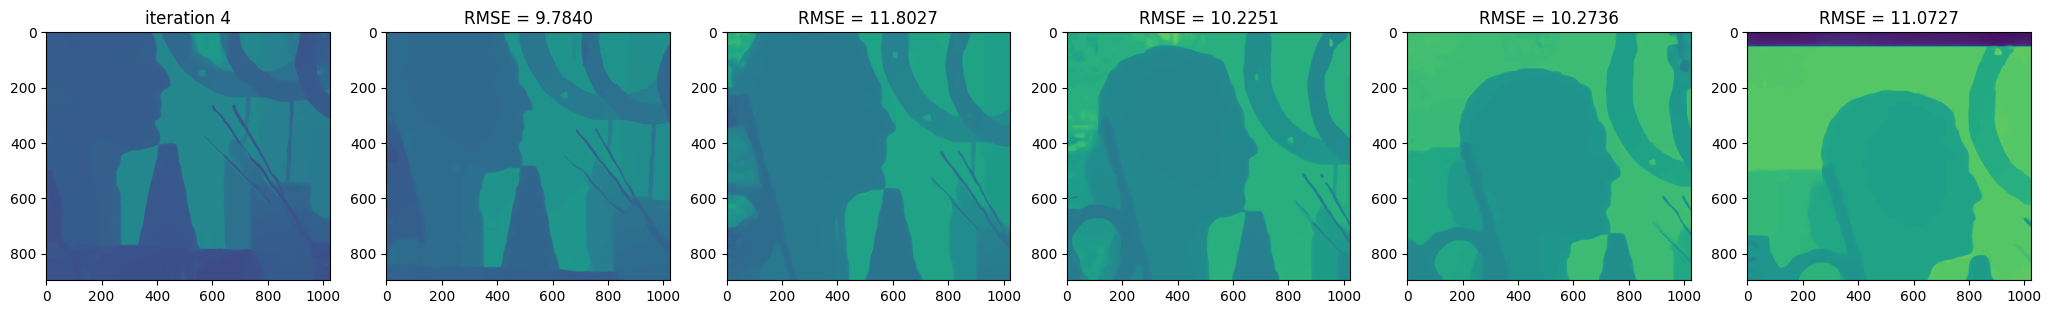

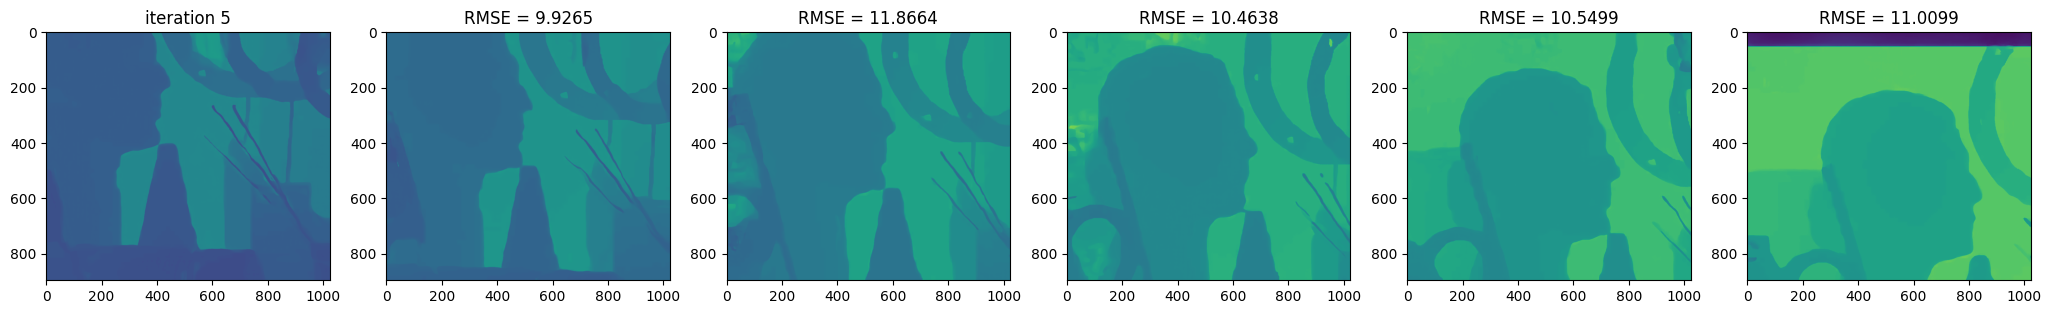

In [3]:
# Initialise the RMSE for stopping criteria
RMSE_ref = 0
arg_continue = 1

for iter in range(N_iterations):
    if arg_continue:
        print(f'iter {iter}')

        # Run HVSR
        os.environ["CUDA_VISIBLE_DEVICES"]="0"
        os.chdir(PATH_TO_HVSR)
        process = subprocess.Popen(
            ['python', 'video_demo.py', 'configs/hvsr_ownhist_config.py', 'chkpts/hvsr_tartan.pth','data/' + name_path, 'results/'+name_path+'new', '--device', str(0)],  
            stdout=subprocess.PIPE)
        output, error = process.communicate()
        path_iteration = f'{PATH_TO_HVSR}/results/'+str(name_path)+ f'iter_{iter}'
        os.makedirs(path_iteration, exist_ok=True)
        
        plt.figure(figsize=(30,7))
        RMSE_tab = []

        # Update each histogram
        for index in range(6):

            # Load the high-resolution color image at the end of the current frame
            color_end = cv2.imread(os.path.join(path, 'color', f"{index:06d}"+'.png'))
            img = np.mean(color_end, axis =2)

            if index >=1:
                ###  Adjust the alignment in Z of the binary frames 
                # Load array of M binary frames aligned in X
                xy_HR_depth = np.load(os.path.join(path, 'depth_xy', f"{index:06d}"+'.npy')) #array of M binary frames aligned in X/Y

                # Calculate depth displacement in the Z-axis from the histogram
                # Load histograms at time t-1 and time t and compute HR_depth1 and HR_depth2
                histogram_index_b = np.load(os.path.join(path, 'histogram', f"{index-1:06d}"+'.npy'))
                depth_1 = center_of_mass_test(histogram_index_b)
                HR_depth1 = cv2.resize(depth_1, (depth_1.shape[1]*4, depth_1.shape[0]*4 ), interpolation= cv2.INTER_NEAREST)/num_bins

                histogram_index = np.load(os.path.join(path, 'histogram', f"{index:06d}"+'.npy'))
                depth_2 = center_of_mass_test(histogram_index)
                HR_depth2 = cv2.resize(depth_2, (depth_1.shape[1]*4, depth_1.shape[0]*4 ), interpolation= cv2.INTER_NEAREST)/num_bins

                # Load RGB images for optical flow estimation in XY
                color_start_temp = cv2.imread(os.path.join(path, 'color', f"{index-1:06d}"+'.png'))/255
                color_start_temp = color_start_temp[::4,::4,:] # Downsample the image for speed
                img_start_temp = np.mean(color_start_temp, axis =2) # Convert to grayscale
                Nx, Ny = img_start_temp.shape[0], img_start_temp.shape[1]
                color_end_temp = cv2.imread(os.path.join(path, 'color', f"{index:06d}"+'.png'))/255
                color_end_temp = color_end_temp[::4,::4,:]
                img_end_temp = np.mean(color_end_temp, axis =2)

                # Calculate optical flow between two consecutive images
                v, u = optical_flow_tvl1(img_end_temp, img_start_temp)
                row_coords, col_coords = np.meshgrid(np.arange(Nx), np.arange(Ny),indexing='ij')

                # Align HR_depth1 in XY with HR_depth2
                alignment_factor = 1
                HR_depth1_init = HR_depth1.copy()
                HR_depth1 = warp(HR_depth1, np.array([row_coords + alignment_factor*v, col_coords + alignment_factor*u]),mode='edge', order=0)

                # Calculate displacement in depth ds
                dz = HR_depth2 - HR_depth1
                dz = ndimage.median_filter(dz, size=16*2)
                
                # Align in z the M binary frames aligned in X/Y xy_HR_depth
                alignment_factors = 1 - np.arange(M) / (M - 1)
                alignment_factors = alignment_factors.reshape((1, 1, M))
                non_zero_mask = xy_HR_depth != 0
                dz_broadcasted = np.expand_dims(dz, axis=-1)
                xyz_HR_depth = np.where(non_zero_mask, xy_HR_depth + alignment_factors * dz_broadcasted, 0)
                

                # Convert the M depth maps to histogram
                xyz_HR_depth = xyz_HR_depth*num_bins
                Nx, Ny = xyz_HR_depth.shape[0], xyz_HR_depth.shape[1]  
                
                xyz_HR_depth[xyz_HR_depth>num_bins-1] = num_bins-1
                pixel_map = xyz_HR_depth.astype(int)
                IRF_matrix = np.zeros((num_bins, num_bins))
                np.fill_diagonal(IRF_matrix, 1)
                histograms = IRF_matrix[pixel_map.ravel()].reshape(Nx, Ny, M, num_bins)
                histograms[pixel_map == 0] = 0

                # Combine the histogram 
                combined_histograms = histograms.sum(axis=2)
                time4 = time.time()
                
                # Compute depth
                depth = center_of_mass_test(combined_histograms)/combined_histograms.shape[2]
                depth = ndimage.zoom(depth, [4,4], order=0)

                # Compute'perfect' histogram from depth 
                histogram_init= dtof_hist_with_img(depth, img*255,num_bins)
            else:
                #For the first image: load original histogram with refining the alignment in z
                path_save = f'{PATH_TO_HVSR}/data/{name_path}/histogram_init'
                histogram_init = np.load(os.path.join(path_save, f"{index:06d}"+'.npy'))
                # depth = np.argmax(histogram_init, 2)

            #Load the HR depth output of HVSR
            HR_depth = np.load(f'{PATH_TO_HVSR}/results/'+str(name_path)+'new'+f"/{index:08d}"+'.npy').squeeze()
            HR_depth[HR_depth>1] = 1
            HR_depth[HR_depth<0] = 0
            np.save(os.path.join(path_iteration, f"{index:06d}"+'.npy'),HR_depth)

            #Convert to histogram
            histogram_fromHVSR = dtof_hist_with_img(HR_depth, img,num_bins)

            #Compute weighted sum between histogram_fromHVSR and the original histogram histogram_init
            ratio = np.sum(histogram_init.flatten())/np.sum(histogram_fromHVSR.flatten())
            new_histogram = (ratio*histogram_fromHVSR+1*histogram_init)/(1+ratio) # mu to control the level of photons between the two 

            #Save new histogram
            np.save(os.path.join(f'{PATH_TO_HVSR}/data/{name_path}/histogram', f"{index:06d}"+'.npy'), new_histogram)  
            
            #COMPARISON 

            GT_depth = np.load(os.path.join(path, 'GT_depth', f"{index:06d}"+'.npy'))
            RMSE = np.sqrt(np.mean((HR_depth*max_val - GT_depth*max_val) ** 2))
            np.save(os.path.join(path, f'RMSE{index:06d}.npy'), RMSE)
            RMSE_tab.append(RMSE)


            
            #Stopping criteria
            if np.mean(RMSE_tab) < RMSE_ref or np.abs(np.mean(RMSE_tab) - RMSE_ref) > 0.05:
                RMSE_ref = np.mean(RMSE_tab)
            else:
                arg_continue = 0

            plt.subplot(1,7,index+1)
            plt.imshow(HR_depth)
            plt.clim([0,1])
            
            if index == 0 :
                plt.title(f'iteration {iter}')
            else : 
                plt.title(f'RMSE = {RMSE:.4f}')
    iter = iter + 1
